In [1]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
RANDOM_STATE = 175
PATH_FOLDER = os.path.join(os.getcwd(), "")
PATH_FOLDER

'c:\\Users\\dvdgo\\Desktop\\TFM\\dsc-fintech\\'

In [4]:
print("Working with this sklearn version {}".format(sklearn.__version__))

Working with this sklearn version 1.4.1.post1


Importación de los datos

In [5]:
PATH_DATA = os.path.join(PATH_FOLDER, 'clean_data.csv')

df = pd.read_csv(PATH_DATA)

EDA sobre el **dataset**

In [6]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    print()
    print(f"Tenemos un total de {total_nulos} nulos")

In [7]:
report_df(df)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936633 entries, 0 to 5936632
Data columns (total 28 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Index               int64  
 1   pk_cid              int64  
 2   pk_partition        object 
 3   entry_date          object 
 4   entry_channel       object 
 5   active_customer     float64
 6   segment             int64  
 7   short_term_deposit  int64  
 8   loans               int64  
 9   mortgage            int64  
 10  funds               int64  
 11  securities          int64  
 12  long_term_deposit   int64  
 13  em_account_pp       int64  
 14  credit_card         int64  
 15  payroll             float64
 16  pension_plan        float64
 17  payroll_account     int64  
 18  emc_account         int64  
 19  debit_card          int64  
 20  em_account_p        int64  
 21  em_acount           int64  
 22  country_id          int64  
 23  region_code         float64
 24  gender              int6

,Index,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,...,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,2,0,0,0,...,0,0,0,1,0,29.0,0,35,0,87218.10
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,0,0,1,0,13.0,1,23,0,35548.74
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,0,0,1,0,13.0,1,23,0,122179.11
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,3,1,0,0,...,0,0,0,0,0,50.0,0,22,0,119775.54
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,3,0,0,0,...,0,0,0,1,0,50.0,1,23,0,96796.23


In [8]:
df["salary"].mean()

109407.55760145198

In [9]:
percentil = df['salary'].quantile(0.95)
percentil

232733.01

In [11]:
df = df.drop(df[df['salary'] > percentil].index)

In [12]:
customer_unic = df["pk_cid"].nunique()
pedidos_count = df["pk_cid"].count()

print(f'''Tenemos un total de {customer_unic} clientes únicos. \n
para un total de {pedidos_count} registros.
''')

Tenemos un total de 433224 clientes únicos. 

para un total de 5639817 registros.



In [13]:
df.shape

(5639817, 28)

In [14]:
df2 = df.copy()

In [15]:
# Renombrar la columna 'pk_partition' para reflejar el conteo de registros
#resultados_por_cliente.rename(columns={'pk_partition': 'registros_totales'}, inplace=True)

Definicion de rangos de etarios

In [16]:
df2['age'].value_counts().sort_index()

age
2       621
3      1380
4      1982
5      2614
6      2796
       ... 
100      87
101      84
102      60
103      19
104       3
Name: count, Length: 103, dtype: int64

In [17]:
df2['age'].mean()

29.67056945287409

In [18]:
# Funcion para definir los rangos de edad
def categorizar_edad(edad):
    if edad <= 17:
        return 'Menores de Edad'
    elif edad <= 30:
        return 'Jovenes Adultos'
    elif edad <= 65:
        return 'Trabajadores'
    else:
        return 'Jubilados'

In [19]:
# Aplicar la función a la columna "age" para crear la nueva columna "age_group"
df2['age_group'] = df['age'].apply(categorizar_edad)

In [20]:
# Muestra las primeras filas del DataFrame para verificar que se haya creado correctamente la columna
df2.head()

,Index,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,...,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,age_group
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,2,0,0,0,...,0,0,1,0,29.0,0,35,0,87218.10,Trabajadores
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,0,1,0,13.0,1,23,0,35548.74,Jovenes Adultos
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,0,1,0,13.0,1,23,0,122179.11,Jovenes Adultos
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,3,1,0,0,...,0,0,0,0,50.0,0,22,0,119775.54,Jovenes Adultos
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,3,0,0,0,...,0,0,1,0,50.0,1,23,0,96796.23,Jovenes Adultos


In [21]:
df2['age_group'].value_counts()

age_group
Jovenes Adultos    3864668
Trabajadores       1634519
Jubilados           108875
Menores de Edad      31755
Name: count, dtype: int64

In [22]:
user_age_group = df2.groupby('age_group')['pk_cid'].nunique()
user_age_group

age_group
Jovenes Adultos    289693
Jubilados            9481
Menores de Edad      2532
Trabajadores       138472
Name: pk_cid, dtype: int64

In [23]:
conteo_edad_por_usuario = df2.groupby('pk_cid')['age'].nunique()

In [24]:
# Filtrar los pk_cid que tienen más de un valor de edad
pk_cid_con_mas_de_una_edad = conteo_edad_por_usuario[conteo_edad_por_usuario > 1]
pk_cid_con_mas_de_una_edad

pk_cid
16502      2
17457      2
17799      2
17970      2
18704      2
          ..
1548142    2
1548156    2
1548180    2
1548181    2
1548186    2
Name: age, Length: 323330, dtype: int64

Definicion de regiones por cantidad de habitantes

In [25]:
df2['region_code'].nunique()

52

In [26]:
df2['region_code'].value_counts()

region_code
28.0    1030284
8.0      533130
46.0     350636
30.0     293979
41.0     275728
15.0     248012
29.0     178686
36.0     170106
3.0      167398
11.0     155844
33.0     131713
50.0     129811
6.0      121487
35.0     119307
47.0     114828
45.0     101025
18.0     100967
37.0      91327
10.0      82860
14.0      74099
2.0       71392
21.0      71287
13.0      69682
12.0      67864
39.0      66646
7.0       58263
32.0      54328
27.0      51890
43.0      50492
9.0       47307
17.0      46565
25.0      45834
16.0      35798
48.0      35008
24.0      34813
26.0      34281
4.0       32072
31.0      31081
49.0      30652
23.0      30612
38.0      28185
34.0      27176
19.0      26462
40.0      21241
5.0       21189
22.0      20862
20.0      18704
1.0       12871
44.0      12518
42.0       8399
51.0       2637
52.0       2479
Name: count, dtype: int64

In [27]:
# Define el diccionario de mapeo de códigos de región a nombres de ciudad
mapeo_region = {
    1: 'Álava', 2: 'Albacete', 3: 'Alicante', 4: 'Almería', 5: 'Ávila', 6: 'Badajoz', 7: 'Baleares',
    8: 'Barcelona', 9: 'Burgos', 10: 'Cáceres', 11: 'Cádiz', 12: 'Castellón', 13: 'Ciudad Real',
    14: 'Córdoba', 15: 'La Coruña', 16: 'Cuenca', 17: 'Gerona', 18: 'Granada', 19: 'Guadalajara',
    20: 'Guipúzcoa', 21: 'Huelva', 22: 'Huesca', 23: 'Jaén', 24: 'León', 25: 'Lérida', 26: 'La Rioja',
    27: 'Lugo', 28: 'Madrid', 29: 'Málaga', 30: 'Murcia', 31: 'Navarra', 32: 'Orense', 33: 'Asturias',
    34: 'Palencia', 35: 'Las Palmas', 36: 'Pontevedra', 37: 'Salamanca', 38: 'Santa Cruz de Tenerife',
    39: 'Cantabria', 40: 'Segovia', 41: 'Sevilla', 42: 'Soria', 43: 'Tarragona', 44: 'Teruel', 45: 'Toledo',
    46: 'Valencia', 47: 'Valladolid', 48: 'Vizcaya', 49: 'Zamora', 50: 'Zaragoza', 51: 'Ceuta', 52: 'Melilla'
}

In [28]:
# Crea la nueva columna "region_name" utilizando el diccionario de mapeo
df2['region_name'] = df['region_code'].map(mapeo_region)

In [29]:
df2.head()

,Index,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,...,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,age_group,region_name
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,2,0,0,0,...,0,1,0,29.0,0,35,0,87218.10,Trabajadores,Málaga
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,1,0,13.0,1,23,0,35548.74,Jovenes Adultos,Ciudad Real
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,1,0,13.0,1,23,0,122179.11,Jovenes Adultos,Ciudad Real
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,3,1,0,0,...,0,0,0,50.0,0,22,0,119775.54,Jovenes Adultos,Zaragoza
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,3,0,0,0,...,0,1,0,50.0,1,23,0,96796.23,Jovenes Adultos,Zaragoza


In [30]:
df2['region_name'].value_counts().sum()

5639817

In [31]:
# 1. Contar la cantidad de usuarios únicos por region_code
users_por_region = df.groupby('region_code')['pk_cid'].nunique().reset_index()

In [32]:
# 2. Segmentar las regiones en tres grupos basados en la cantidad de usuarios únicos
cuantiles = users_por_region['pk_cid'].quantile([0.33, 0.66])
users_por_region['region_size'] = pd.cut(users_por_region['pk_cid'], bins=[0, cuantiles.iloc[0], cuantiles.iloc[1], users_por_region['pk_cid'].max()+1], labels=['Pequeña', 'Mediana', 'Grande'])

In [33]:
# 3. Asignar a cada region_code una etiqueta correspondiente al tamaño de la ciudad
df2 = pd.merge(df2, users_por_region[['region_code', 'region_size']], on='region_code', how='left')

In [34]:
df2.head()

,Index,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,...,em_acount,country_id,region_code,gender,age,deceased,salary,age_group,region_name,region_size
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,2,0,0,0,...,1,0,29.0,0,35,0,87218.10,Trabajadores,Málaga,Grande
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,1,0,13.0,1,23,0,35548.74,Jovenes Adultos,Ciudad Real,Mediana
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,1,0,13.0,1,23,0,122179.11,Jovenes Adultos,Ciudad Real,Mediana
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,3,1,0,0,...,0,0,50.0,0,22,0,119775.54,Jovenes Adultos,Zaragoza,Grande
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,3,0,0,0,...,1,0,50.0,1,23,0,96796.23,Jovenes Adultos,Zaragoza,Grande


In [35]:
df2['region_size'].value_counts().sum()

5639817

In [36]:
df2['region_size'].value_counts()

region_size
Grande     4314268
Mediana     960402
Pequeña     365147
Name: count, dtype: int64

Obtener los productos adquiridos segun ingreso familiar. Definir bloques de ingresos

In [37]:
df2['salary'].min()

1202.73

In [38]:
df2['salary'].max()

232733.01

Agrupar los productos por ganancia

In [39]:
df2['Financiacion'] = df2[['credit_card', 'debit_card', 'loans', 'mortgage', 'securities']].sum(axis=1).astype(int)
df2['Ahorro'] = df2[['funds', 'long_term_deposit', 'pension_plan', 'short_term_deposit']].sum(axis=1).astype(int)
df2['Cuentas'] = df2[['em_account_p', 'em_account_pp', 'em_acount', 'payroll','payroll_account','emc_account']].sum(axis=1).astype(int)

In [40]:
df2.head(5)

,Index,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,...,gender,age,deceased,salary,age_group,region_name,region_size,Financiacion,Ahorro,Cuentas
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,2,0,0,0,...,0,35,0,87218.10,Trabajadores,Málaga,Grande,0,0,1
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,1,23,0,35548.74,Jovenes Adultos,Ciudad Real,Mediana,0,0,1
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,1,23,0,122179.11,Jovenes Adultos,Ciudad Real,Mediana,0,0,1
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,3,1,0,0,...,0,22,0,119775.54,Jovenes Adultos,Zaragoza,Grande,0,1,0
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,3,0,0,0,...,1,23,0,96796.23,Jovenes Adultos,Zaragoza,Grande,0,0,1


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5639817 entries, 0 to 5639816
Data columns (total 34 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Index               int64   
 1   pk_cid              int64   
 2   pk_partition        object  
 3   entry_date          object  
 4   entry_channel       object  
 5   active_customer     float64 
 6   segment             int64   
 7   short_term_deposit  int64   
 8   loans               int64   
 9   mortgage            int64   
 10  funds               int64   
 11  securities          int64   
 12  long_term_deposit   int64   
 13  em_account_pp       int64   
 14  credit_card         int64   
 15  payroll             float64 
 16  pension_plan        float64 
 17  payroll_account     int64   
 18  emc_account         int64   
 19  debit_card          int64   
 20  em_account_p        int64   
 21  em_acount           int64   
 22  country_id          int64   
 23  region_code         float64 
 24

In [42]:
product_age_group = df2.groupby('age_group')[['Financiacion', 'Ahorro', 'Cuentas']].sum()
product_age_group

,Financiacion,Ahorro,Cuentas
age_group,,,
Jovenes Adultos,173356,67728,3306992
Jubilados,15383,27146,92189
Menores de Edad,0,131,55
Trabajadores,427124,232226,1571100


In [43]:
product_region_size = df2.groupby('region_size')[['Financiacion', 'Ahorro', 'Cuentas']].sum()
product_region_size

,Financiacion,Ahorro,Cuentas
region_size,,,
Pequeña,40331,21751,323808
Mediana,91558,44567,871552
Grande,483974,260913,3774976


Creación de variables

In [44]:
df3 = df2.copy()

In [45]:
df3.head()

,Index,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,...,gender,age,deceased,salary,age_group,region_name,region_size,Financiacion,Ahorro,Cuentas
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,2,0,0,0,...,0,35,0,87218.10,Trabajadores,Málaga,Grande,0,0,1
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,1,23,0,35548.74,Jovenes Adultos,Ciudad Real,Mediana,0,0,1
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,1,23,0,122179.11,Jovenes Adultos,Ciudad Real,Mediana,0,0,1
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,3,1,0,0,...,0,22,0,119775.54,Jovenes Adultos,Zaragoza,Grande,0,1,0
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,3,0,0,0,...,1,23,0,96796.23,Jovenes Adultos,Zaragoza,Grande,0,0,1


Cuantos age_group's hay
Edad max min y mean
Cantidad de Users por region_size

In [46]:
aggregated_features = df3.groupby(["pk_cid"]).agg(

  
   
    age_group_Jubilados = ('age_group', lambda series: (series == 'Jubilados').max() * 1),
    age_group_JovenAdulto = ('age_group', lambda series: (series == 'Jovenes Adultos').max() * 1),
    age_group_Menores = ('age_group', lambda series: (series == 'Menores de Edad').max() * 1),
    age_group_Trabajadores = ('age_group', lambda series: (series == 'Trabajadores').max() * 1),

   
    

    Grande_region_size = ('region_size', lambda series: (series == 'Grande').max() * 1),
    Mediana_region_size = ('region_size', lambda series: (series == 'Mediana').max() * 1),
    Pequeña_region_size = ('region_size', lambda series: (series == 'Pequeña').max() * 1),

    

)
aggregated_features

,age_group_Jubilados,age_group_JovenAdulto,age_group_Menores,age_group_Trabajadores,Grande_region_size,Mediana_region_size,Pequeña_region_size
pk_cid,,,,,,,
15891,0,0,0,1,1,0,0
16063,0,0,0,1,1,0,0
16203,1,0,0,0,1,0,0
16502,0,0,0,1,1,0,0
17457,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
1553685,0,0,0,1,0,1,0
1553686,0,1,0,0,1,0,0
1553687,0,1,0,0,1,0,0


In [47]:
df3['Financiacion'].value_counts()

Financiacion
0    5074016
1     517629
2      46282
3       1890
Name: count, dtype: int64

In [48]:
df2_agg_features = pd.merge(df2, aggregated_features, on= "pk_cid")

In [49]:
report_df (df2_agg_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5639817 entries, 0 to 5639816
Data columns (total 41 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Index                   int64   
 1   pk_cid                  int64   
 2   pk_partition            object  
 3   entry_date              object  
 4   entry_channel           object  
 5   active_customer         float64 
 6   segment                 int64   
 7   short_term_deposit      int64   
 8   loans                   int64   
 9   mortgage                int64   
 10  funds                   int64   
 11  securities              int64   
 12  long_term_deposit       int64   
 13  em_account_pp           int64   
 14  credit_card             int64   
 15  payroll                 float64 
 16  pension_plan            float64 
 17  payroll_account         int64   
 18  emc_account             int64   
 19  debit_card              int64   
 20  em_account_p            int64   
 21  em_acoun

In [50]:
df2_agg_features

,Index,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,...,Financiacion,Ahorro,Cuentas,age_group_Jubilados,age_group_JovenAdulto,age_group_Menores,age_group_Trabajadores,Grande_region_size,Mediana_region_size,Pequeña_region_size
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,2,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,3,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,3,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639812,5962919,1166765,2019-05-28,2016-08-14,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5639813,5962920,1166764,2019-05-28,2016-08-14,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5639814,5962921,1166763,2019-05-28,2016-08-14,KHE,1.0,2,0,0,0,...,0,0,1,0,0,0,1,1,0,0
5639815,5962922,1166789,2019-05-28,2016-08-14,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [51]:
# convertimos las fechas al formato fechas dado que hasta ahora eran object y no nos permitían hacer casi ninguna transformación

df2_agg_features['pk_partition'] =\
pd.to_datetime(df2_agg_features['pk_partition'], format = '%Y-%m-%d')

df2_agg_features['entry_date'] =\
pd.to_datetime(df2_agg_features['entry_date'], format = '%Y-%m-%d')

In [52]:
df2_agg_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5639817 entries, 0 to 5639816
Data columns (total 41 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   Index                   int64         
 1   pk_cid                  int64         
 2   pk_partition            datetime64[ns]
 3   entry_date              datetime64[ns]
 4   entry_channel           object        
 5   active_customer         float64       
 6   segment                 int64         
 7   short_term_deposit      int64         
 8   loans                   int64         
 9   mortgage                int64         
 10  funds                   int64         
 11  securities              int64         
 12  long_term_deposit       int64         
 13  em_account_pp           int64         
 14  credit_card             int64         
 15  payroll                 float64       
 16  pension_plan            float64       
 17  payroll_account         int64         
 18  em

In [53]:
# Ordenar el DataFrame por pk_cid y pk_partition
df_sorted = df2_agg_features.sort_values(by=['pk_cid', 'pk_partition'])

In [54]:
df2_agg_features['pk_partition'].min()


Timestamp('2018-01-28 00:00:00')

In [55]:
df2_agg_features['pk_partition'].max()

Timestamp('2019-05-28 00:00:00')

In [56]:
df2_agg_features['entry_date'].min()

Timestamp('2015-01-01 00:00:00')

In [57]:
df2_agg_features['entry_date'].max()

Timestamp('2019-05-31 00:00:00')

In [58]:
df2_agg_features.shape

(5639817, 41)

Intentamos obtener fechas de relacion ultima compra pero la particion obtenida no permite hacer este analisis.

In [59]:
df3 = df2_agg_features.copy(deep= True)

In [60]:
df3

,Index,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,...,Financiacion,Ahorro,Cuentas,age_group_Jubilados,age_group_JovenAdulto,age_group_Menores,age_group_Trabajadores,Grande_region_size,Mediana_region_size,Pequeña_region_size
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,2,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,3,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,3,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639812,5962919,1166765,2019-05-28,2016-08-14,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5639813,5962920,1166764,2019-05-28,2016-08-14,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5639814,5962921,1166763,2019-05-28,2016-08-14,KHE,1.0,2,0,0,0,...,0,0,1,0,0,0,1,1,0,0
5639815,5962922,1166789,2019-05-28,2016-08-14,KHE,0.0,3,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [61]:
df3.set_index('pk_cid', inplace= True)

lc = [
    "salary",    
    "age_group_Jubilados",
    "age_group_JovenAdulto",
    "age_group_Menores",
    "age_group_Trabajadores",
    "age",    
    "Grande_region_size",
    "Mediana_region_size",
    "Pequeña_region_size",
    "Financiacion",
    "Ahorro",
    "Cuentas"
]

df3 = df3[lc]

In [62]:
df3

,salary,age_group_Jubilados,age_group_JovenAdulto,age_group_Menores,age_group_Trabajadores,age,Grande_region_size,Mediana_region_size,Pequeña_region_size,Financiacion,Ahorro,Cuentas
pk_cid,,,,,,,,,,,,
1375586,87218.10,0,0,0,1,35,1,0,0,0,0,1
1050611,35548.74,0,1,0,0,23,0,1,0,0,0,1
1050612,122179.11,0,1,0,0,23,0,1,0,0,0,1
1050613,119775.54,0,1,0,0,22,1,0,0,0,1,0
1050614,96796.23,0,1,0,0,23,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,43912.17,0,1,0,0,22,1,0,0,0,0,1
1166764,23334.99,0,1,0,0,23,0,0,1,0,0,1
1166763,96796.23,0,0,0,1,47,1,0,0,0,0,1


In [63]:
df3.isnull().sum()

salary                    0
age_group_Jubilados       0
age_group_JovenAdulto     0
age_group_Menores         0
age_group_Trabajadores    0
age                       0
Grande_region_size        0
Mediana_region_size       0
Pequeña_region_size       0
Financiacion              0
Ahorro                    0
Cuentas                   0
dtype: int64

In [64]:
def build_unique_id_features(X):

    aggregated_df = X.groupby(X.index).agg(
        
        min_ingresos = ('salary', 'min'),
        max_ingresos = ('salary', 'max'),
        avg_ingresos = ('salary', 'mean'), 

        n_age_group_Jubilados = ('age_group_Jubilados', 'max'),
        n_group_JovenAdulto = ('age_group_JovenAdulto', 'max'),
        n_age_group_Menores = ('age_group_Menores', 'max'), 
        n_age_group_Trabajadores = ('age_group_Trabajadores', 'max'),      


        n_region_Grande = ('Grande_region_size', 'max'),
        n_region_Mediana = ('Mediana_region_size', 'max'),
        n_region_Pequeña = ('Pequeña_region_size', 'max'),      


        n_orders_Financiacion = ('Financiacion', 'max'),
        n_orders_Ahorro = ('Ahorro', 'max'),
        n_orders_Cuentas = ('Cuentas', 'max')

    )

    return aggregated_df

In [65]:
ClientIdFeatureGenerator = FunctionTransformer(func = build_unique_id_features)

In [66]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("CustomTransformer", ClientIdFeatureGenerator),
    ("RobustScaler", RobustScaler(quantile_range = (0, 80.0)))
])

In [67]:
df_scaled_transformed = pipe.fit_transform(df3)

In [68]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled_transformed)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


Elbow curve (CORE IDEA)

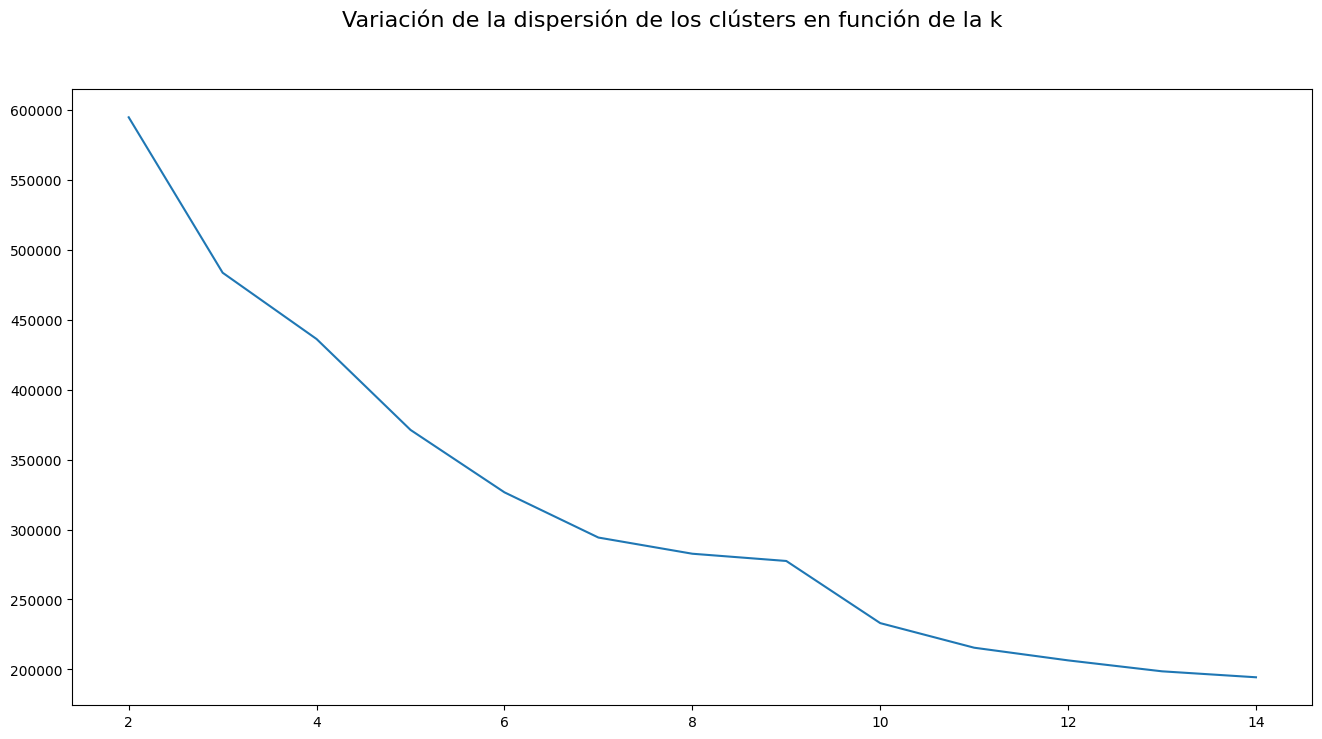

In [69]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Segmentación de los clientes con la "k adecuada"

In [70]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()),
    ("CustomTransformer", ClientIdFeatureGenerator),
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 6, random_state = 175))
])

In [71]:
df3.shape

(5639817, 12)

In [72]:
pipe.fit(df3)

Pipeline(steps=[('Imputer', KNNImputer()),
                ('CustomTransformer',
                 FunctionTransformer(func=<function build_unique_id_features at 0x00000164D2F41C60>)),
                ('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=6, random_state=175))])

Una parte muy interesante de los pipelines es que la podemos filtrar (igual que una lista de python) y usar sólo parte de los pasos que tenemos implementados.

In [73]:
X_processed = pipe[:2].transform(df3)

In [74]:
labels = pipe.predict(df3)

In [75]:
# le asignamos al DataFrame procesado el clúster.
# si lo hacemos al df escalado será más díficil de interpretar los resultados porque los números están escalados
X_processed["cluster"] = labels

In [76]:
X_processed.shape

(433224, 14)

In [77]:
X_processed.head(5)

,min_ingresos,max_ingresos,avg_ingresos,n_age_group_Jubilados,n_group_JovenAdulto,n_age_group_Menores,n_age_group_Trabajadores,n_region_Grande,n_region_Mediana,n_region_Pequeña,n_orders_Financiacion,n_orders_Ahorro,n_orders_Cuentas,cluster
pk_cid,,,,,,,,,,,,,,
15891,126765.57,126765.57,126765.57,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2
16063,126765.57,126765.57,126765.57,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2
16203,124656.36,124656.36,124656.36,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4
16502,126765.57,126765.57,126765.57,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2
17457,102405.75,102405.75,102405.75,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,2


In [78]:
X_processed["max_ingresos"].max()

232733.01

Ficha de los clientes

El último paso, usa vez que tenemos hecha nuestra segmentación completa es crear una ficha resumen de cada grupo con las principales variables de negocio o con aquellas que no se han utilizado en la segmentación para hacer un seguimiento periódico de los grupos o para enviar como documento al resto de los departamentos de la empresa.

In [79]:
import pandas as pd
ficha_df = pd.DataFrame()

In [80]:
for i, col in enumerate(["avg_ingresos", "n_age_group_Jubilados", "n_group_JovenAdulto", "n_age_group_Menores", "n_age_group_Trabajadores", "n_region_Grande", "n_region_Mediana", "n_region_Pequeña", "n_orders_Financiacion", "n_orders_Ahorro", "n_orders_Cuentas"]):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T
    resumen_filtrado = resumen_data.loc[(slice(None), ['mean', 'min', 'max']), :]
    ficha_df = ficha_df._append(resumen_filtrado)

In [81]:
resumen_data

cluster                            0              1              2  \
n_orders_Cuentas count  50304.000000  221927.000000  103699.000000   
                 mean       0.886927       0.804147       0.993954   
                 std        0.405880       0.504561       0.760743   
                 min        0.000000       0.000000       0.000000   
                 25%        1.000000       1.000000       0.000000   
                 50%        1.000000       1.000000       1.000000   
                 75%        1.000000       1.000000       1.000000   
                 max        4.000000       4.000000       4.000000   

cluster                            3            4             5  
n_orders_Cuentas count  30274.000000  9027.000000  17993.000000  
                 mean       0.955804     0.886119      0.846107  
                 std        0.745146     0.664784      0.465749  
                 min        0.000000     0.000000      0.000000  
                 25%        0.000000     0.000000      1.000000  
                 50%        1.000000     1.000000      1.000000  
                 75%        1.000000     1.000000      1.000000  
                 max        4.000000     4.000000      4.000000

In [82]:
ficha_df.shape

(33, 6)

In [83]:
# generamos nuestro multiindex
out_index = [
    "Monetarios",
    "Etario",
    "Etario",
    "Etario",
    "Etario",
    "Region",
    "Region",
    "Region",
    "Producto",
    "Producto",
    "Producto"
]

inner_index = [
    "Salario",
    "Jubilados",
    "JovenAdulto",
    "Menores",
    "Trabajadores",
    "Grande",
    "Mediana",
    "Pequeña",
    "Financiacion",
    "Ahorro",
    "Cuentas"
]

estadisticos = ["Media", "Mínimo", "Máximo"]

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es))

In [84]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [85]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [86]:
print("Longitud del MultiIndex:", len(index_ficha))
print("Cantidad de columnas en ficha_df:", len(ficha_df.columns))
print("Niveles del MultiIndex:", index_ficha.levels)

Longitud del MultiIndex: 33
Cantidad de columnas en ficha_df: 6
Niveles del MultiIndex: [['Etario', 'Monetarios', 'Producto', 'Region'], ['Ahorro', 'Cuentas', 'Financiacion', 'Grande', 'JovenAdulto', 'Jubilados', 'Mediana', 'Menores', 'Pequeña', 'Salario', 'Trabajadores'], ['Media', 'Máximo', 'Mínimo']]


In [87]:
tamaño_clusters = X_processed.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [88]:
ficha_df = tamaño_clusters._append(ficha_df)

In [89]:
133212.000000+192158.000000+72.000000+7.000000+38199.000000+8189.000000+36040.000000+45759.000000

453636.0

In [90]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)